<a href="https://colab.research.google.com/github/HEMANTHSAINI/colab/blob/MASTER/confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load=files.upload()

Saving heart.csv to heart.csv


In [2]:
import pandas as pd
df=pd.read_csv("heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [3]:
from sklearn.model_selection import train_test_split
age=df["age"]
heart_condition=df["target"]
age_train,age_test,heart_condition_train,heart_condition_test=train_test_split(age,heart_condition,test_size=0.25,random_state=0)


In [4]:
from sklearn.linear_model import LogisticRegression
import numpy as np
X=np.reshape(age_train.ravel(),(len(age_train),1))
Y=np.reshape(heart_condition_train.ravel(),(len(heart_condition_train),1))
classifier=LogisticRegression(random_state=0)
classifier.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
X_test=np.reshape(age_test.ravel(),(len(age_test),1))
Y_test=np.reshape(heart_condition_test.ravel(),(len(heart_condition_test),1))
heart_condition_prediction=classifier.predict(X_test)
predicted_values=[]
for i in heart_condition_prediction:
  if i==0:
    predicted_values.append("no")
  else:
    predicted_values.append("yes")
actural_values=[]
for i in Y_test.ravel():
  if i==0:
    actural_values.append("no")
  else:
    actural_values.append("yes")




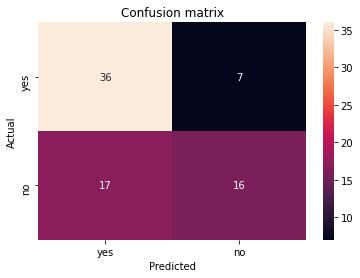

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels=["yes","no"]
cm=confusion_matrix(actural_values,predicted_values,labels)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels);


In [8]:
accuracy=36+16/36+7+17+16
print(accuracy)

76.44444444444444


In [10]:
factors=df[["age","cp","chol","thalach"]]
heart_condition=df["target"]
factors_train,factors_test,heart_condition_train,heart_condition_test=train_test_split(factors,heart_condition,test_size=0.25,random_state=0)



In [20]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
factors_train=scx.fit_transform(factors_train)


In [21]:
classifier2=LogisticRegression(random_state=0)
classifier2.fit(factors_train,heart_condition_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
heart_prediction=classifier2.predict(factors_test)
predicted_values1=[]
for i in heart_prediction:
  if i==0:
    predicted_values1.append("no")
  else:
    predicted_values1.append("yes")
actural_values1=[]
for i in heart_condition_test.ravel():
  if i==0:
    actural_values1.append("no")
  else:
    actural_values1.append("yes")


ValueError: ignored

In [23]:
from sklearn.linear_model import LogisticRegression
import numpy as np
X=np.reshape(factors_train.ravel(),(len(factors_train),1))
Y=np.reshape(heart_condition_train.ravel(),(len(heart_condition_train),1))
classifier=LogisticRegression(random_state=0)
classifier.fit(X,Y)

ValueError: ignored